# Introduction

In this project we will interpret data from the national park service about endangered species in different parks.
During this project we will analyze, clean up and plot some data as well as pose some questions and seek to find an answer for them. Also investigation will be needed to see if there are any pattern or theme on the types of species that become endangered.

**Data Sources**

Both `species_info.csv` and `observations.csv` are provided by [codecademy.com](https://www.codecademy.com)


# Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?


# Import python modules

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import dataframe_image as dfi


ModuleNotFoundError: No module named 'dataframe_image'

## Import and Explore the Data

### Species

In [16]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [17]:
print('species shape:', species.shape)

species shape: (5824, 4)


In [18]:
print('Unique conservation statuses:', species.conservation_status.unique())

Unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [19]:
print(species.groupby('conservation_status').size())
print('na values:' , species.conservation_status.isna().sum())

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
na values: 5633


In [20]:
print('number of unique categories:', species.category.nunique())
print(species.groupby('category').size())

number of unique categories: 7
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [21]:
print('number of species:', species.scientific_name.nunique())

number of species: 5541


### Observations

In [22]:
observation = pd.read_csv('observations.csv')
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [23]:
print('number of parks:', observation.park_name.nunique())
print('park names:', observation.park_name.unique())

number of parks: 4
park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [24]:
print('observation shape:' , observation.shape)

observation shape: (23296, 3)


In [25]:
print('number of all the observations:', observation.observations.sum())

number of all the observations: 3314739


## Analysis

First task will be to clean and explore the `conservation_status` in `species`.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration a lot of Nans were detected. These values will need to be converted to `No Intervention`.

In [26]:
species.conservation_status.fillna('No Intervention', inplace=True)
print(species.groupby('conservation_status').size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


Next is to checkout the different categories that are nested in the conservation_status column except for the ones that do not require an intervention. There is both the table and chart to explore below.

In [27]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name'].count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


For those in `Endangered` category, 7 were in Mammals and 4 in birds. In the `In Recovery` status there are 3 birds and 1 mammals which means that the birds are bouncing back more than mammals.

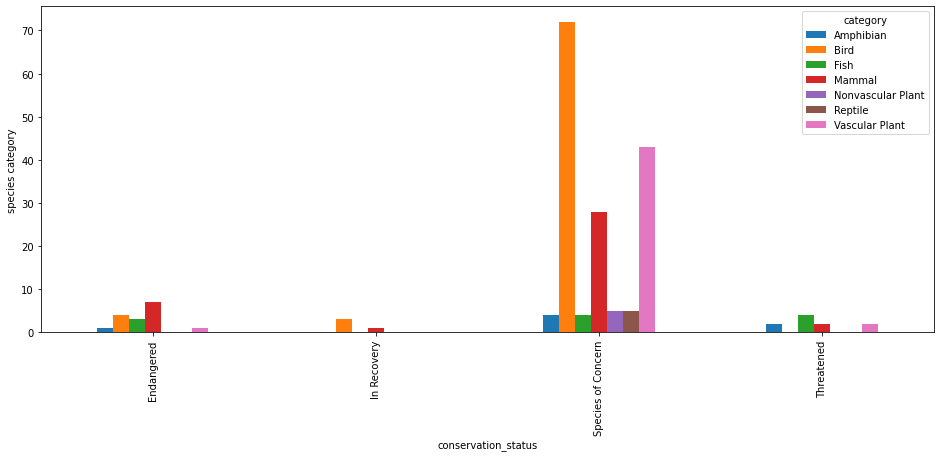

In [28]:
ax = conservationCategory.plot(kind='bar', figsize=(16,6))

ax.set_xlabel('conservation_status')
ax.set_ylabel('species category')
plt.savefig('species_category')

#### In conservations

The next question is if certain type of species are more likely to be endangered. This can be done by adding a column called `is_protected` and include the species that had a value except `No Invervention`.

In [29]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [30]:
categoryCount = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
    .pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

categoryCount.columns = ['category', 'not_protected', 'is_protected']

categoryCount

,category,not_protected,is_protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


It is most useful to have percentage of protection each `category` exibits in the data.

In [31]:
categoryCount['percent_protection'] = categoryCount.is_protected / (categoryCount.is_protected + categoryCount.not_protected) * 100
categoryCount

,category,not_protected,is_protected,percent_protection
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds.

#### Statistical Significance

In this section, chi-squared tests will be taken to see if different species has statistically significant difference in their conservation status rates. To run a chi-squared test, a contingency table will need to be created first.

The first test will be contingency1 and going to test the difference between `mamals` and `birds`.

In [32]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
               [75, 413]]

chi2_contingency(contingency1)


(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

chi_squared test will return many values but the second value which is 0.68 is p_value. The standard p_value to test the statistical significant is 0.05. since 0.68 is much higher than 0.05 in the case of mamals and birds there is not significant relationship between them i.e variables are independent.

Next test calles contingency2 will test the relationship between `mamals` and `reptiles`.

In [33]:
contingency2 = [[30, 146],
               [5, 73]]

chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

The p_value retrived from this test i.e 0.03 is smaller than 0.05 which can be take that there is statistically significant difference between mamals and reptiles. Mamals are shown to have statistically significant higher rate of needed protection than the reptiles. 

#### Species in parks

This step is to look at the `common names` in species to get an idea of the most `prevalent` animals in parks. First data will be need to be split up into individual names.

In [34]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == 'Mammal'].common_names\
    .apply(remove_punctuations).str.split().tolist()

common_Names[:6]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [35]:
#next to clean up duplicant word so they won't count more than once

cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [36]:
from itertools import chain

res = list(chain.from_iterable(cleanRows))
res[:6]

#Another method

#from pandas.core.common import flatten

#res = list(flatten(cleanRows))
#res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurences of each word.

In [37]:
word_count = []

for i in res:
    x = res.count(i)
    word_count.append((i, x))
    
word_count[:6]

[('Gappers', 1),
 ('RedBacked', 2),
 ('Vole', 11),
 ('American', 12),
 ('Bison', 2),
 ('Aurochs', 1)]

In [38]:
#This list will need to be converted into a dataframe

pd.DataFrame(set(word_count), columns=['word', 'count']).sort_values('count', ascending=False).head(10)


,word,count
167,Bat,23
94,Shrew,18
12,Myotis,17
81,Mouse,16
6,Chipmunk,13
125,Squirrel,12
161,American,12
126,Eastern,11
66,Vole,11
36,Western,10


In the data, there so many different scientific names referring to bats. Next task would be to figure out which rows of `species` are reffering to bats. 

In [39]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [40]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next, the results of the bat species will be merged with the `observation` table to create a dataframe with observations of bats across each national park.

In [41]:
bat_observation = observation.merge(species[species.is_bat])
bat_observation

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


The total number of bats observed in each park over the past 7 days are in the table below.

In [42]:
bat_observation.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [48]:
#Now let's see each park broken down by protected bats vs. non-protected bat sightings.

obs_by_bat = bat_observation.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_bat


,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


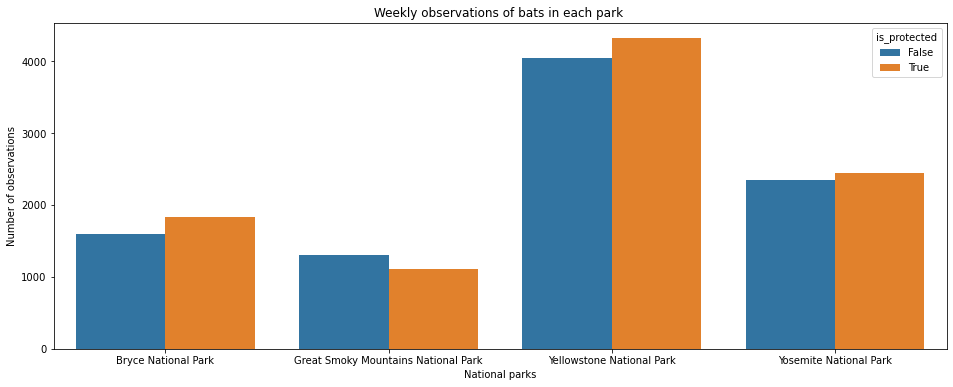

In [44]:
#below is a plot from the output of the last data manipulation.

plt.figure(figsize=(16, 6))
sns.barplot(data=obs_by_bat, x='park_name', y='observations', hue='is_protected')
plt.xlabel('National parks')
plt.ylabel('Number of observations')
plt.title('Weekly observations of bats in each park ')
plt.savefig('obs_of_bats.png')

From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.

## Conclusion

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
    
    
    
